In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils, plot_help


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
                            roc_curve, roc_auc_score, precision_recall_curve

from joblib import dump, load

%matplotlib inline

In [2]:
#change read limit to -1 to load entire dataframe
df = utils.chunk_loader('data/cleaned/business_merge_feats.csv', read_limit=-1)

df_num = utils.make_num_df(df)

#drop columns from feature importance permutation
drop_col = ['gluten_free', 'dairy_free', 'Spas', 'Hair', 'road_type', 'asian',
            'perms', 'vegan', 'Health', 'kosher', 'halal', 'soy_free', 'vegetarian',
            'AgesAllowed', 'Beauty', 'curly', 'kids', 'thursday', 'africanamerican',
            'dessert', 'intimate', 'romantic', 'valet', 'validated', 'HasTV',
            'brunch', 'RestaurantsCounterService', 'hipster', 'Open24Hours', 'BYOB',
            'Corkage', 'DogsAllowed', 'BusinessAcceptsBitcoin', 'CoatCheck',
            'classy', 'divey', 'extensions', 'monday', 'coloring', 'straightperms',
            'sunday', 'GoodForDancing', 'wednesday', 'tuesday', 'karaoke',
            'touristy', 'video', 'jukebox', 'background_music', 'dj', 'upscale',
            'trendy', 'no_music']
#drop cols
df_num = df_num.drop(labels=drop_col, axis=1)

In [3]:
X_train, X_test, y_train, y_test = utils.train_test_scale (df_num, 
                                                           'is_open', 
                                                           random_state=None)

In [4]:
best_params = {'criterion': 'gini', 
               'max_depth': 15, 
               'min_samples_leaf': 1, 
               'min_samples_split': 4, 
               'n_estimators': 400, 
               'n_jobs': -1}

print(best_params)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400, 'n_jobs': -1}


## Undersampling

In [5]:
#apply undersampling
X_under, y_under = utils.undersample(X_train, y_train)

#check mean dist
y_under.mean()

0.5

In [6]:
#instantiate gb tree regression
rf_under = RandomForestClassifier(criterion='gini', 
                                   max_depth=15, 
                                   min_samples_leaf = 1, 
                                   min_samples_split=4, 
                                   n_estimators=400, 
                                   n_jobs=-1)


rf_under.fit(X_under, y_under)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.39      0.68      0.50      6072
           1       0.91      0.76      0.83     26160

    accuracy                           0.74     32232
   macro avg       0.65      0.72      0.66     32232
weighted avg       0.81      0.74      0.76     32232

----------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


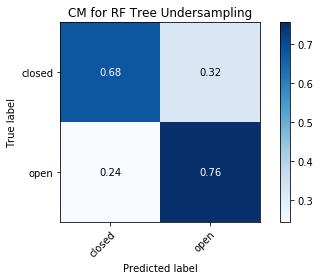

----------


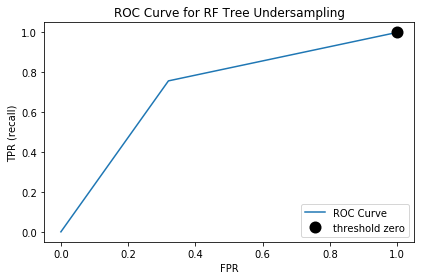

Area Under Curve = 0.7186
----------


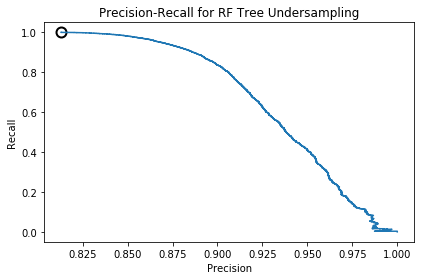

In [7]:
#make pred with undersampling
y_pred_under = rf_under.predict(X_test)

print(classification_report(y_test, y_pred_under))
print(10*'-')
plot_help.plot_confusion_matrix(y_test, y_pred_under, ['closed', 'open'], normalize=True,
                                title='RF Tree Undersampling')
print(10*'-')
plot_help.plot_roc_curve(y_test, y_pred_under, 'RF Tree Undersampling')
print(10*'-')
plot_help.plot_prc_curve(y_test, rf_under.predict_proba(X_test)[:, 1], 'RF Tree Undersampling')

## Oversample

In [8]:
#apply undersampling
X_over, y_over = utils.oversample(X_train, y_train)

#check mean 
y_over.mean()

0.44714800950378614

In [9]:
#instantiate gb tree regression
rf_over = RandomForestClassifier(criterion='gini', 
                                   max_depth=15, 
                                   min_samples_leaf = 1, 
                                   min_samples_split=4, 
                                   n_estimators=400, 
                                   n_jobs=-1)


rf_over.fit(X_over, y_over)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.39      0.69      0.50      6072
           1       0.91      0.75      0.82     26160

    accuracy                           0.74     32232
   macro avg       0.65      0.72      0.66     32232
weighted avg       0.81      0.74      0.76     32232

----------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


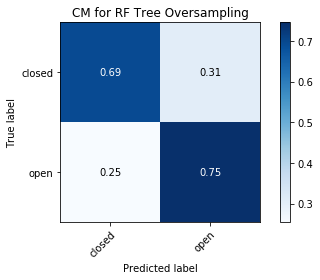

----------


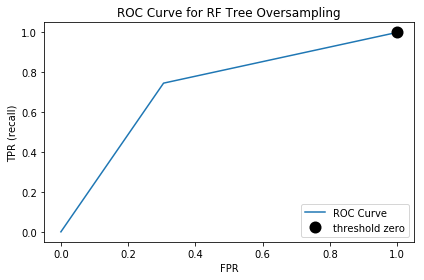

Area Under Curve = 0.7201
----------


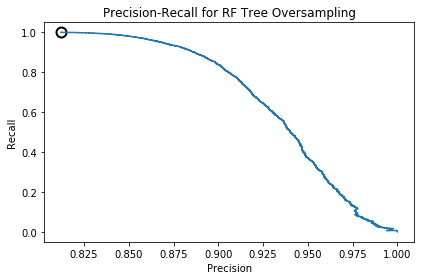

In [10]:
#make pred with undersampling
y_pred_over = rf_over.predict(X_test)

print(classification_report(y_test, y_pred_over))
print(10*'-')
plot_help.plot_confusion_matrix(y_test, y_pred_over, ['closed', 'open'], normalize=True,
                                title='RF Tree Oversampling')
print(10*'-')
plot_help.plot_roc_curve(y_test, 
                         y_pred_over, 
                         'RF Tree Oversampling')
print(10*'-')
plot_help.plot_prc_curve(y_test, 
                         rf_over.predict_proba(X_test)[:, 1], 
                         'RF Tree Oversampling')